# Project Drawdown Model Engine: Start Here

This jupyter notebook contains a top-level, minimal-code introduction to the PDME library.  It aims to introduce you to some of the features of the library and to show some common patterns that you might use to use the library for yourself.

For more detail, investigate the [main documentation](https://projectdrawdown.github.io/solutions/).  

(A helpful tutorial for jupyter notebooks is [here](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb), or [here](https://youtu.be/3C9E2yPBw7s?t=131) if you'd prefer a video introduction.)

Table of Contents:
* [Setup](#Setup)
* [Solutions](#Solutions)

# Setup

Always run the cell below; it imports modules we'll use later.
(Run the cell by putting your cursor in it and clicking on the "&#9654; Run" button above.)

In [1]:
from solution import factory
import pandas as pd
from matplotlib import pyplot as plt
#plt.style.use('seaborn-darkgrid')  # optional

# Solutions

The PDME library contains all of the solutions published by Project Drawdown.  You can see the list of these solutions by running either of the two cells below.  (The Ocean solutions are missing from these lists for technical reasons that we will eventually resolve; for now see the section on [Oceans](#Oceans) below)

In [2]:
# Return the list of identifiers of all (non-Ocean) solutions

print(factory.all_solutions())

['afforestation', 'airplanes', 'altcement', 'bamboo', 'bikeinfrastructure', 'biochar', 'biogas', 'biogas_small', 'biomass', 'bioplastic', 'buildingautomation', 'carpooling', 'commercialglass', 'composting', 'concentratedsolar', 'conservationagriculture', 'coolroofs', 'coveredmanurelagoons', 'districtheating', 'electricbikes', 'electricvehicles', 'farmlandrestoration', 'forestprotection', 'geothermal', 'grasslandprotection', 'greenroofs', 'hcrecycling', 'heatpumps', 'hfc_replacement', 'highspeedrail', 'hybridcars', 'improvedcattlefeed', 'improvedcookstoves', 'improvedrice', 'indigenouspeoplesland', 'instreamhydro', 'insulation', 'irrigationefficiency', 'landfillmethane', 'leds_commercial', 'leds_residential', 'managedgrazing', 'mangroverestoration', 'masstransit', 'methaneleak', 'microwind', 'multistrataagroforestry', 'nuclear', 'nutrientmanagement', 'offshorewind', 'onshorewind', 'peatlandrestoration', 'peatlands', 'perennialbioenergy', 'recycledmetals', 'recycledpaper', 'recycledplast

In [3]:
# Return the list of ids and titles of all the (non-Ocean) solutions.
# This one is a little slower, because it is actually loading code for each solution

for soln_id in factory.all_solutions():
    soln = factory.load_solution(soln_id)
    print(f'{soln_id:>30}:  {soln.name}')

                 afforestation:  Afforestation
                     airplanes:  Aircraft Fuel Efficiency
                     altcement:  Alternative Cements
                        bamboo:  Bamboo
            bikeinfrastructure:  Bike Infrastructure
                       biochar:  Biochar
                        biogas:  Large Biodigesters (Biogas)
                  biogas_small:  Small Biogas Digesters
                       biomass:  Biomass from Perennial Crops for Electricity Generation
                    bioplastic:  Bioplastics
            buildingautomation:  Building Automation Systems
                    carpooling:  Ridesharing & Carpooling
               commercialglass:  High-Performance Glass (Commercial)
                    composting:  Composting
             concentratedsolar:  Concentrated Solar Power (CSP)
       conservationagriculture:  Conservation Agriculture
                     coolroofs:  Cool Roofs
          coveredmanurelagoons:  Covered Anaerobic Lagoons


# Scenarios

A Solution describes a type of technology to address climate change, but a Scenario defines a set of specific assumptions about that technology, including its cost, effectiveness and adoption.  When working the the PDME, we will usually be working with Scenarios.

Solutions may have any number of Scenarios.  Those published with the PDME will always have at least three Scenarios which illustrate the most recent "Plausible", "Drawdown" and "Optimum" scenarios published by Project Drawdown.  To make matters simple, these are always accessible by the labels "PDS1", "PDS2" and "PDS3".

Here we list the scenarios available within the PDME code for a specific Solution (Bike Infrastructure), then load the Drawdown Scenario for that Solution:

In [2]:
print(factory.list_scenarios("electricvehicles"))

# The names returned in the print are the full code names of the scenarios, but we will use the
# PDS2 shortcut to load the Drawdown scenario.

ecars2 = factory.load_scenario("electricvehicles", "PDS2")

['PDS1-21p2050-ComDat-FullyIntegrated', 'PDS2-33p2050-ComDat-FullyIntegrated', 'PDS3-92p2050-ComData-FullyIntegrated']


### Looking at the Scenario Parameters

There are many parameters that are used to define a Scenario, and some of those parameters are more arcane than others.  The `key_inputs` method returns a set of the most important scalar parameter values.

In [3]:
ecars2.key_inputs()

{'pds_2014_cost': 36317.523345066766,
 'soln_lifetime_capacity': 0.000346582848014648,
 'soln_avg_annual_use': 2.4485619375e-05,
 'soln_fixed_oper_cost_per_iunit': 634.2005524308272,
 'soln_var_oper_cost_per_funit': 13224200.431077885,
 'soln_energy_efficiency_factor': 0.0,
 'soln_fuel_efficiency_factor': 0.8964768329017938,
 'soln_emissions_per_funit': 0.0,
 'soln_indirect_co2_per_iunit': 12.55864172870986}

The parameter names can be a bit cryptic.  We can (sometimes) get a better explanation of what they mean by using the `explain_parameter` method:

In [4]:
print(ecars2.ac.explain_parameter('soln_var_oper_cost_per_funit'))

SOLUTION Variable Operating Cost (VOM)
NOTE: This is the annual operating cost per functional unit, derived from the SOLUTION. In most cases this will be expressed as a cost per 'some unit of energy'.

E.g., $1 per Kwh or $1,000,000,000 per TWh. In terms of transportation, this can be considered the weighted average price of fuel per passenger kilometer.


The other major input is Adoption, which is the amount of some good or service that is *provided or supported by* the solution technology.

Let's look at the adoption of this scenario:

In [5]:
ecars2_adoption = ecars2.ht.soln_pds_funits_adopted()
ecars2_adoption

,World,OECD90,Eastern Europe,Asia (Sans Japan),Middle East and Africa,Latin America,China,India,EU,USA
Year,,,,,,,,,,
2014,116.388993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,121.576689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,126.764385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,131.952081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,137.139777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,100.956104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,183.949188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,290.436083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,421.080403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This result demonstrates a number of important things:

* `ecars2.ht.soln_pds_funits_adopted()` is an example of a pattern `<scenario>.<category>.<methodname>()` that is common across the PDME library.  The category identifies an area of analysis for the scenario.  The methodname identifies what you want to know within that category.  We'll cover the list of most important categories and methodsTODO.
* The input adoption is specified in something called 'functional units' (aka 'funits'), which varies by Solution.  You can find out what the different kind of units for a Solution are with the expression `<scenario>.units`
* You can see above that there multiple columns of adoption data, which are associated with different regions of the world.  For many solutions, including this one, we do not have data at the regional level, and only the `World` column will be filled in. 
* The output of this method (and many others) is a Pandas Dataframe.  This is a popular Python library for data manipulation that makes it easy to do many numerical and statistical operations, and also to graph the data.

Illustrating these points:

In [6]:
# Show the units associated with this solution
ecars2.units

{'implementation unit': 'vehicle',
 'functional unit': 'billion passenger-km',
 'first cost': 'US$B',
 'operating cost': 'US$B'}

In [7]:
# Show only 'World' data.
ecars2_adoption['World']

Year
2014      116.388993
2015      121.576689
2016      126.764385
2017      131.952081
2018      137.139777
2019      100.956104
2020      183.949188
2021      290.436083
2022      421.080403
2023      576.545759
2024      757.495765
2025      964.594032
2026     1198.504174
2027     1459.889802
2028     1749.414529
2029     2067.741967
2030     2415.535730
2031     2793.459429
2032     3202.176677
2033     3642.351087
2034     4114.646271
2035     4619.725841
2036     5158.253410
2037     5730.892591
2038     6338.306995
2039     6981.160236
2040     7660.115926
2041     8375.837677
2042     9128.989102
2043     9920.233814
2044    10750.235424
2045    11619.657545
2046    12529.163790
2047    13479.417772
2048    14471.083102
2049    15504.823394
2050    16581.302259
2051    17701.183310
2052    18865.130160
2053    20073.806421
2054    21327.875706
2055    22628.001627
2056    23974.847796
2057    25369.077827
2058    26811.355331
2059    28302.343921
2060    29842.707210
Name: Wo

<AxesSubplot:title={'center':'Electric Vehicle Use'}, xlabel='Year', ylabel='billion passenger-km'>

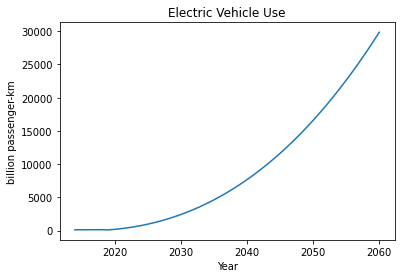

In [8]:
# Graph the world adoption data, with the units as an axis label.
# Here we are using the default Pandas plotting function

ecars2_adoption['World'].plot(ylabel=ecars2.units['functional unit'], title='Electric Vehicle Use')

The adoption data for this scenario is estimated from 2014 to 2060.  You often want to look at the data from the current year onwards.  (Side note: there is some inconsistency between scenarios in how they handle "prior" data, so it is generally advised to ignore data before the current year.)

The pandas syntax to select a subset of years (rows) is a little obscure: use `somedf.loc[minyear:maxyear]`.  Note the use of square brackets instead of the parenthesis you might expect.

<AxesSubplot:title={'center':'Electric Vehicle Use'}, xlabel='Year', ylabel='billion passenger-km'>

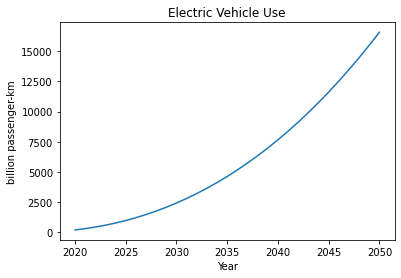

In [30]:
# this is legal:  ecars2_adoption.loc[2020:2050]['World']
# so is this:     ecars2_adoption['World'].loc[2020:2050]
# or you can combine them:

ecars2_ad = ecars2_adoption.loc[2020:2050,'World']

ecars2_ad.plot(ylabel=ecars2.units['functional unit'], title='Electric Vehicle Use')

### Scenario Outputs

